In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt


/Users/johnnosal/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


http://www.diabetes.org/advocacy/news-events/cost-of-diabetes.html
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3609540/
https://www.americanwell.com/how-hospitals-are-reducing-medical-costs-with-telehealth/

In [2]:
# Suppress unnecessary warnings so that
# presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('data4.pkl', 'r') as picklefile:
    data = pickle.load(picklefile)

In [4]:
print data['readmitted'].value_counts()/len(data)

0    0.656136
1    0.343864
Name: readmitted, dtype: float64


In [5]:
data2 = data.ix[:, data.columns != 'patient_nbr']

In [57]:
X = data2.ix[:, data2.columns != 'readmitted']
y = data['readmitted']


In [84]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=data[['readmitted']].values)



# **DECISION TREE**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [8]:
DTC = DecisionTreeClassifier(max_depth=14, random_state=1)
DTC.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [9]:
# compute the feature importances
pd.DataFrame({'feature':X.columns,
              'importance':DTC.feature_importances_}).sort_values('importance',
                                                                      ascending=False).head(10)

,feature,importance
7,number_inpatient,0.219855
2,num_lab_procedures,0.083951
4,num_medications,0.071601
8,number_diagnoses,0.056855
1,time_in_hospital,0.040843
5,number_outpatient,0.029774
3,num_procedures,0.023511
6,number_emergency,0.020261
87,admission_source_id_Transfer,0.014295
10,diabetesMed,0.013722


In [127]:
scores = cross_val_score(DTC, X_train, y_train, cv=10)
print scores
scores.mean()

[ 0.66        0.66306122  0.65795918  0.6555102   0.65176567  0.6625842
  0.65659453  0.66333197  0.66353614  0.66639445]


0.66007375640890553

In [11]:
#Grid search parameters
PARAMETERS = {'max_depth':[8,10,12,14], 'max_features':[5,10,20], 
              'max_leaf_nodes':[5,10,20]}
#SCORING = 'mean_squared_error'

In [12]:
from sklearn.grid_search import GridSearchCV

#Grid Search for DT

rfc = GridSearchCV(DTC, PARAMETERS, verbose=True, n_jobs=-1)
rfc.fit(X, y)

#After completion, show the final best results and scores
print rfc.best_estimator_
print rfc.best_score_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/johnnosal/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   32.7s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=20, max_leaf_nodes=20, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
0.679269007101


# **ADA BOOST**

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)

In [15]:
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=100, random_state=None)

In [16]:
ada.score(X,y)

0.68632746081415119

# **GRADIENT BOOSTING**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [131]:
GBCTest = GradientBoostingClassifier(n_estimators=200)
GBCTest.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [132]:
GBCTest.score(X_train,y_train)

0.69608083282302513

In [133]:
pd.DataFrame({'feature':X.columns,
              'importance':GBCTest.feature_importances_}).sort_values('importance',
                                                                      ascending=False).head(20)

,feature,importance
2,num_lab_procedures,0.109385
4,num_medications,0.089016
7,number_inpatient,0.080093
1,time_in_hospital,0.042374
6,number_emergency,0.038900
5,number_outpatient,0.031566
8,number_diagnoses,0.029482
3,num_procedures,0.024325
88,admission_source_id_Unknown,0.020574
91,max_glu_serum_None,0.018655


In [123]:
from sklearn.grid_search import GridSearchCV
#Parameters for GB Grid Search

PARAMETERSgbc = {'n_estimators':[200], 'learning_rate':[0.1,0.2], 
              'max_depth':[3,5,10]}

#Grid Search for GBC
gbcgs = GridSearchCV(GBCTest, PARAMETERSgbc, verbose=True, n_jobs=-1)
gbcgs.fit(X, y)

#After completion, show the final best results and scores
print gbcgs.best_estimator_
print gbcgs.best_score_


TypeError: Singleton array array(99) cannot be considered a valid collection.

In [74]:
# make predictions
preds = GBCTest.predict(X_test)

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['readmitted'])

In [105]:
#50/50 GBC confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, GBCTest.predict(X_test))
predicted_cols = [c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,0,1
0,12601,1176
1,5379,1841


In [106]:
#50/50 GBC classification report
print classification_report(y_test, preds)

             precision    recall  f1-score   support

          0       0.70      0.91      0.79     13777
          1       0.61      0.25      0.36      7220

avg / total       0.67      0.69      0.64     20997



# **SPLITTING PREDICTIONS**

In [85]:
predWy = pd.DataFrame(GBCTest.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])

In [86]:
predWy['true'] = y_test

In [87]:
predWy

,class_0_pp,class_1_pp,true
0,0.427083,0.572917,0
1,0.691607,0.308393,0
2,0.848375,0.151625,0
3,0.686436,0.313564,1
4,0.568682,0.431318,0
5,0.548159,0.451841,0
6,0.827069,0.172931,0
7,0.820162,0.179838,1
8,0.578562,0.421438,0
9,0.627002,0.372998,1


In [88]:
predWyOne = predWy[predWy.true!=0]
predWyZero = predWy[predWy.true!=1]
predWyOne = predWyOne.reset_index(drop=True)
predWyZero = predWyZero.reset_index(drop=True)

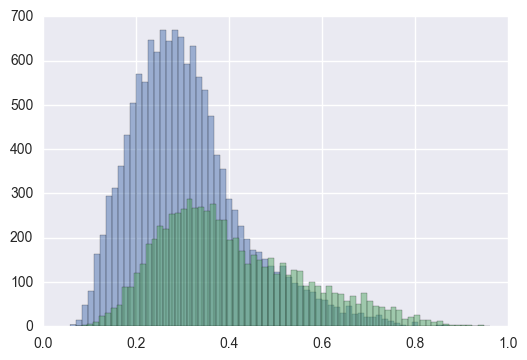

In [124]:
plt.hist(predWyZero['class_1_pp'], bins = 70, alpha=0.5);
plt.hist(predWyOne['class_1_pp'], bins = 70, alpha=0.5);
#plt.hist(Y_pp['class_1_pp'], bins = 70, alpha=0.5);
plt.legend(loc = 'best')
plt.savefig('CSpredict.jpeg')

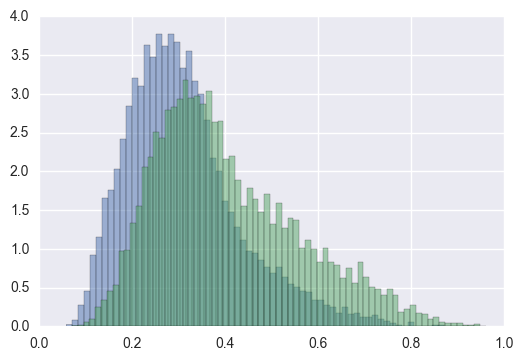

In [125]:
plt.hist(predWyZero['class_1_pp'], bins = 70, alpha=0.5, normed = True);
plt.hist(predWyOne['class_1_pp'], bins = 70, alpha=0.5, normed = True);
#plt.hist(Y_pp['class_1_pp'], bins = 70, alpha=0.5, normed = True);
plt.legend(loc = 'best')
plt.savefig('CSpredictNorm.jpeg')

In [91]:
#Prediction dataframe
Y_pp = pd.DataFrame(GBCTest.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
print(Y_pp.iloc[0:10])
print(len(X_test), len(Y_pp))

   class_0_pp  class_1_pp
0    0.427083    0.572917
1    0.691607    0.308393
2    0.848375    0.151625
3    0.686436    0.313564
4    0.568682    0.431318
5    0.548159    0.451841
6    0.827069    0.172931
7    0.820162    0.179838
8    0.578562    0.421438
9    0.627002    0.372998
(20997, 20997)


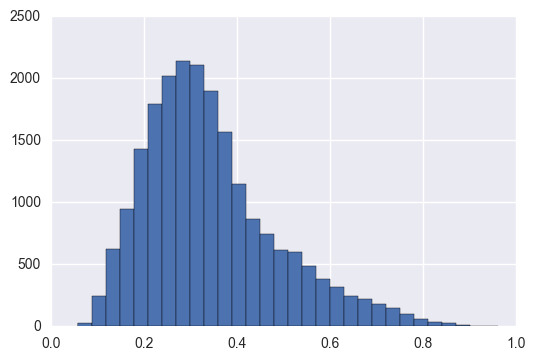

In [92]:
plt.hist(Y_pp['class_1_pp'], bins = 30);


In [93]:
for y in range(1,100):
    Y_pp[y] = [1 if x >= (y/100.) else 0 for x in Y_pp.class_1_pp.values]

In [94]:
Y_pp.head()

,class_0_pp,class_1_pp,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0.427083,0.572917,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.691607,0.308393,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.848375,0.151625,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.686436,0.313564,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.568682,0.431318,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
def confma(x):
    conf = confusion_matrix(y_test, x)
    predicted_cols = [c for c in le.classes_]
    return pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)


In [102]:
def classfx(x):
    conf = classification_report(y_test, x)
    predicted_cols = [c for c in le.classes_]
    return pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

In [176]:
zeroList = []
oneList = []
oneRecall = []
zeroRecall = []
onePrec = []
zeroPrec = []
dayCost = []
FN = []
for x in range (1,100):
    print 'Confusion Matrix of ' + str(x) + ' is:'
    confx = confma(Y_pp[x])
    print confx
    FN.append(confx[0][1]/7220.)
    zeroList.append((confx[0][0]+confx[0][1])/20997.)
    oneList.append((confx[1][0]+confx[1][1])/20997.)
    zeroRecall.append((confx[0][0]/13777.))
    oneRecall.append((confx[1][1]/7220.))
    onePrec.append((float(confx[1][1])/(confx[1][0]+confx[1][1])))
    zeroPrec.append((float(confx[0][0])/(confx[0][1]+confx[0][0]+0.000000001)))
    dayCost.append((confx[0][1]*4.379)+float(confx[1][0])-(confx[1][1]*2.4))

Confusion Matrix of 1 is:
   0      1
0  0  13777
1  0   7220
Confusion Matrix of 2 is:
   0      1
0  0  13777
1  0   7220
Confusion Matrix of 3 is:
   0      1
0  0  13777
1  0   7220
Confusion Matrix of 4 is:
   0      1
0  0  13777
1  0   7220
Confusion Matrix of 5 is:
   0      1
0  0  13777
1  0   7220
Confusion Matrix of 6 is:
   0      1
0  1  13776
1  0   7220
Confusion Matrix of 7 is:
   0      1
0  2  13775
1  0   7220
Confusion Matrix of 8 is:
    0      1
0  11  13766
1   1   7219
Confusion Matrix of 9 is:
    0      1
0  29  13748
1   1   7219
Confusion Matrix of 10 is:
    0      1
0  79  13698
1   6   7214
Confusion Matrix of 11 is:
     0      1
0  147  13630
1    8   7212
Confusion Matrix of 12 is:
     0      1
0  266  13511
1   17   7203
Confusion Matrix of 13 is:
     0      1
0  415  13362
1   37   7183
Confusion Matrix of 14 is:
     0      1
0  606  13171
1   59   7161
Confusion Matrix of 15 is:
     0      1
0  829  12948
1   80   7140
Confusion Matrix of 16 is

ZeroDivisionError: float division by zero

In [179]:
oneP = zip(range (1,100), onePrec, oneList)
zeroP = zip(range (1,100), zeroPrec, zeroList)
both =  zip(range (1,100), zeroPrec, onePrec)
both

[(1, 0.0, 0.3438586464733057),
 (2, 0.0, 0.3438586464733057),
 (3, 0.0, 0.3438586464733057),
 (4, 0.0, 0.3438586464733057),
 (5, 0.0, 0.3438586464733057),
 (6, 0.99999999899999992, 0.3438750238140598),
 (7, 0.99999999949999996, 0.3438914027149321),
 (8, 0.91666666659027773, 0.344007624493686),
 (9, 0.96666666663444445, 0.3443029522583107),
 (10, 0.92941176469494802, 0.34496939556235656),
 (11, 0.94838709676807498, 0.34603205066692255),
 (12, 0.93992932861858691, 0.3477358308390461),
 (13, 0.91814159291832276, 0.349622779265028),
 (14, 0.91127819548735145, 0.3522034231752902),
 (15, 0.91199119911890869, 0.35543608124253284),
 (16, 0.90100671140864008, 0.3585963140621055),
 (17, 0.89657444005211029, 0.36259561579136507),
 (18, 0.88157195963840596, 0.36606675735063304),
 (19, 0.87210824967225142, 0.3703089917673474),
 (20, 0.86316168527156534, 0.3754116355653128),
 (21, 0.85718599033790543, 0.381509754028838),
 (22, 0.84765118089778158, 0.386899206719552),
 (23, 0.83685393258408147, 0.392

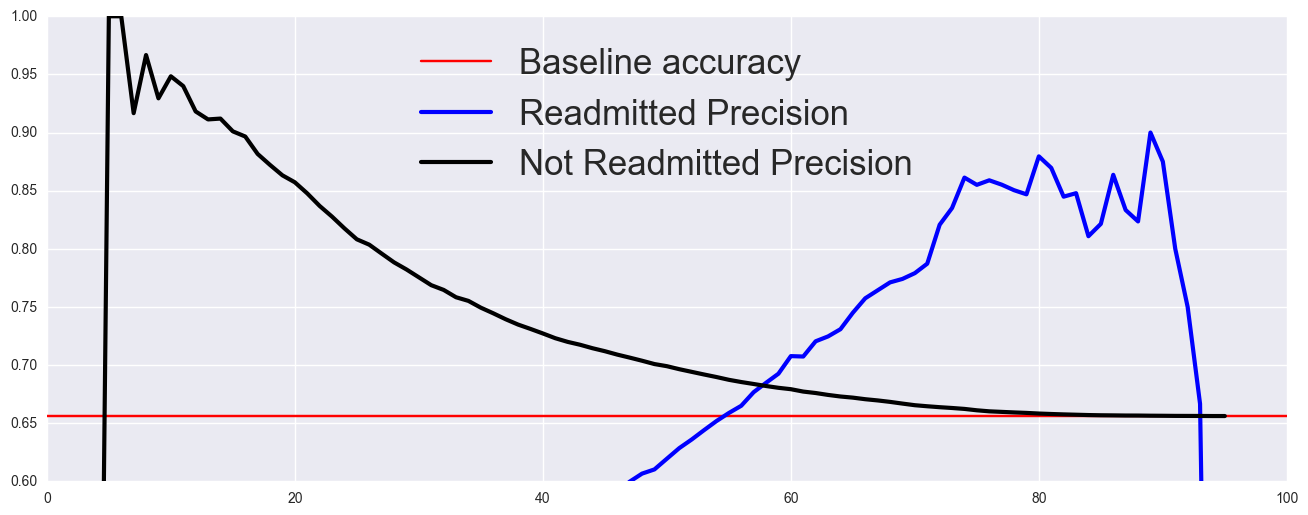

In [182]:
fig = plt.figure(figsize=(16,6))
ax = fig.gca()
ax.axhline(y=0.6561,xmin=0,xmax=100,c="red", label = 'Baseline accuracy')
#plt.plot(dayCost, color = 'orange')
#plt.plot(oneList,color = 'orange')
#plt.plot(zeroList,color = 'red')
#plt.plot(oneRecall, color = 'green')
plt.plot(onePrec, label = 'Readmitted Precision', color = 'blue', linewidth=3)
plt.plot(zeroPrec,label = 'Not Readmitted Precision', color = 'black', linewidth=3)
#plt.plot(zeroRecall, color = 'pink')
ax.set_xlim(0, 100)
ax.set_ylim(0.6, 1.0)
plt.legend(loc = 'best', fontsize = '25')
plt.savefig('CSPrec.jpeg')

[(1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.00013850415512465375), (9, 0.00013850415512465375), (10, 0.0008310249307479224), (11, 0.00110803324099723), (12, 0.0023545706371191134), (13, 0.0051246537396121882), (14, 0.008171745152354571), (15, 0.011080332409972299), (16, 0.016343490304709142), (17, 0.021745152354570637), (18, 0.030886426592797785), (19, 0.040581717451523544), (20, 0.052631578947368418), (21, 0.065512465373961215), (22, 0.081301939058171749), (23, 0.10055401662049862), (24, 0.12229916897506925), (25, 0.14542936288088643), (26, 0.17174515235457063), (27, 0.19459833795013851), (28, 0.22146814404432133), (29, 0.25096952908587256), (30, 0.27963988919667587), (31, 0.31024930747922436), (32, 0.34238227146814404), (33, 0.37049861495844877), (34, 0.40221606648199448), (35, 0.42894736842105263), (36, 0.46038781163434905), (37, 0.48947368421052634), (38, 0.5171745152354571), (39, 0.54349030470914128), (40, 0.56703601108033241), (41, 0.5886426592797

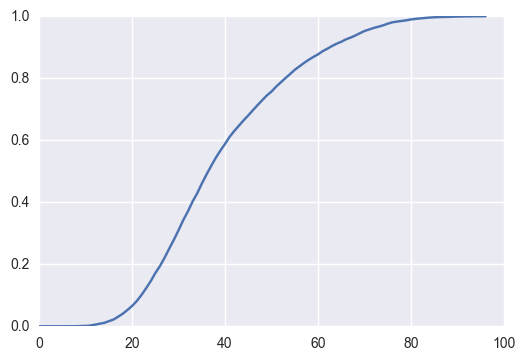

In [178]:
plt.plot(FN)
print zip(range (1,100), FN)